## Customer and Product Insights

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [4]:
df = pd.read_csv("../data/processed/cleaned_retail_sales.csv")
df["date"] = pd.to_datetime(df["date"])
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Customer Demographics Analysis

In [5]:
gender_counts = df["gender"].value_counts()
gender_counts


gender
Female    510
Male      490
Name: count, dtype: int64

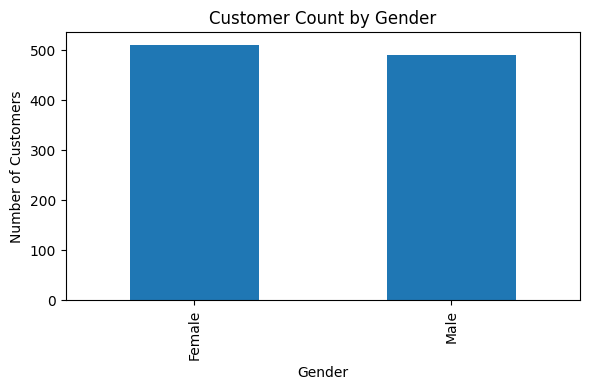

In [6]:
plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar")
plt.title("Customer Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.tight_layout()

plt.savefig("../outputs/figures/customer_count_by_gender.png")
plt.show()


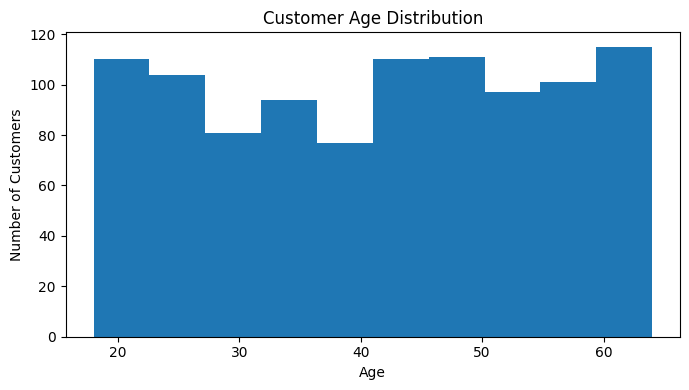

In [7]:
plt.figure(figsize=(7, 4))
plt.hist(df["age"], bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.tight_layout()

plt.savefig("../outputs/figures/age_distribution.png")
plt.show()


In [8]:
category_sales = (
    df.groupby("product_category")["total_amount"]
    .sum()
    .sort_values(ascending=False)
)

category_sales


product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

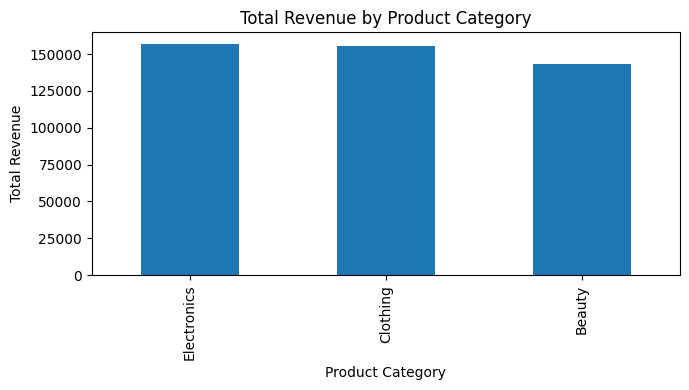

In [9]:
plt.figure(figsize=(7, 4))
category_sales.plot(kind="bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.tight_layout()

plt.savefig("../outputs/figures/revenue_by_category.png")
plt.show()


In [10]:
monthly_sales = (
    df.set_index("date")
      .resample("M")["total_amount"]
      .sum()
)

monthly_sales


C:\Users\tathi\AppData\Local\Temp\ipykernel_33532\3068272697.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")["total_amount"]


date
2023-01-31    35450
2023-02-28    44060
2023-03-31    28990
2023-04-30    33870
2023-05-31    53150
2023-06-30    36715
2023-07-31    35465
2023-08-31    36960
2023-09-30    23620
2023-10-31    46580
2023-11-30    34920
2023-12-31    44690
2024-01-31     1530
Freq: ME, Name: total_amount, dtype: int64

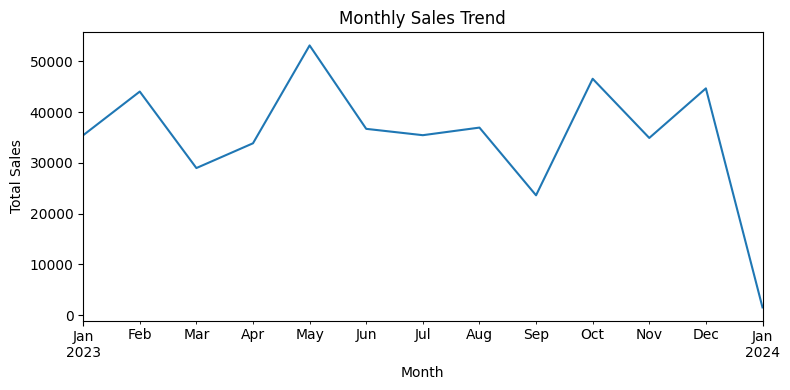

In [11]:
plt.figure(figsize=(8, 4))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()

plt.savefig("../outputs/figures/monthly_sales_trend.png")
plt.show()


In [12]:
average_order_value = df["total_amount"].mean()
average_order_value


np.float64(456.0)